# Rohan Khaitan MDS201812

# Advertising Data

In [1]:
import pandas as pd
import numpy as np
import sklearn
import chardet
import os

In [2]:
os.chdir("/home/rohan/CMI/SEM 2/AML/Advertising_ISLR/AdvertisingData")

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
data_raw=pd.read_csv("Advertising.csv")

In [5]:
data_raw.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
data_raw.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
data=data_raw.drop(['Unnamed: 0'],axis=1)

In [8]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [10]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Visualization:Scatter Plots

Scatter plots:


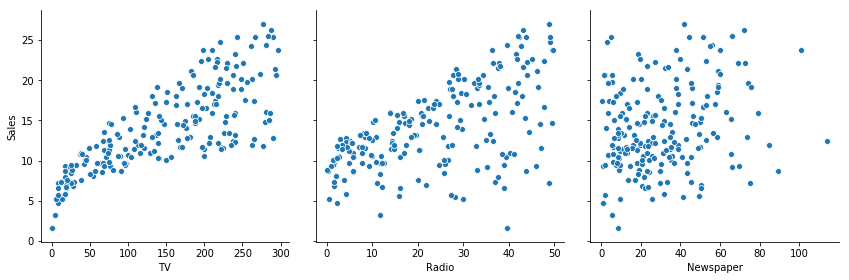

In [12]:
#Visualizing the data by scatter plot to get an idea about the influence of TV,Radio,Newspaper on Sales

import seaborn as sns
print("Scatter plots:")
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=4, aspect=1)

# Comment-
From the scatter plots we can see that for Newspaper vs Sales, the points are more randomly scattered compared to
the other two plots and it suggests Newspaper doesn't have much effect on Sales.From TV vs Sales plot,it seems that TV has a significant effect on Sales where the Radio vs Sales plot shows that there is a moderate effect of Radio on Sales.
    


# Multiple Linear Regression
   Predictor-TV,Radio,NewsPaper

   Response-Sales

In [13]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales~ TV + Radio + Newspaper', data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           1.58e-96
Time:                        17:12:17   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Comment-
We can see that the R-square value for this multiple linear regression model is high(0.897).

But from the tablewe can also see that the p-value corresponding to the co-efficient of newspaper in the model
is way greater than 0.05.If multicollinearity is not present then it suggests that the null hypothesis that
"The co-efficient corresponding to Variable Newspaper is 0" is accepted at 5% level of significance which implies that Newspaper doesn't have much influence on Sales.

So it is better to check the influence of 'TV','Radio' and 'Newspaper' on 'sales' separately and then choosing
a model based on the variables which influence sales significantly.

# Simple Linear Regression
 
 1.Predictor- TV, Response- Sales
 
 2.Predictor- Radio, Response- Sales
 
 3.Predictor- NewsPaper, Response- Sales



Feature- TV,
Response- Sales

In [14]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales~ TV', data=data).fit()
lm.summary()
#lm.rsquared

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           1.47e-42
Time:                        17:13:28   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Comment-
The R-square value for this model indicates a good fit.
Now our null hypothesis is, "The co-efficient corresponding to variable TV in the model is zero"
But the null hypothesis is rejected at 5% level of significance as the p-value is much less that 0.05.
So overall we can conclude that TV has a significant effect on Sales.

Fitted Regression Line for TV & Sales: 


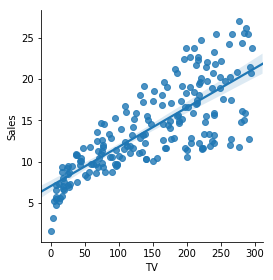

In [15]:
print("Fitted Regression Line for TV & Sales: ")
sns.pairplot(data, x_vars=['TV'], y_vars='Sales', height=4, aspect=1, kind='reg')

Feature- Radio,
Response- Sales

In [16]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales~ Radio', data=data).fit()
lm.summary()
#lm.rsquared

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           4.35e-19
Time:                        17:13:59   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Comment-
The R-square value for this model indicates a moderately good fit.
Now our null hypothesis is, "The co-efficient corresponding to variable Radio in the model is zero"
and here the null hypothesis is rejected at 5% level of significance as the p-value is much less that 0.05.
So overall we can conclude that Radio has a significant effect on Sales.

Fitted Regression Line for Radio & Sales: 


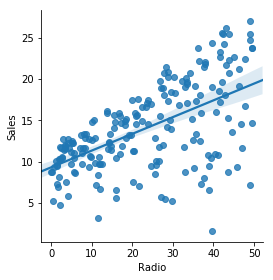

In [17]:
print("Fitted Regression Line for Radio & Sales: ")
sns.pairplot(data, x_vars=['Radio'], y_vars='Sales', height=4, aspect=1, kind='reg')

Feature- Newspaper,
Response- Sales

In [18]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales~ Newspaper', data=data).fit()
lm.summary()
#lm.rsquared

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Thu, 07 Feb 2019   Prob (F-statistic):            0.00115
Time:                        17:14:54   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Comment-
The R-square value for this model indicates a bad fit.
Now our null hypothesis is, "The co-efficient corresponding to variable Newspaper in the model is zero"
But the null hypothesis is rejected at 5% level of significance as the p-value is much less that 0.05.So it 
suggests that Newspaper has an effect on Sales.


Fitted Regression Line for Newspaper & Sales: 


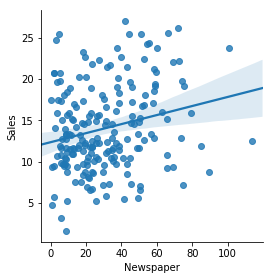

In [19]:
print("Fitted Regression Line for Newspaper & Sales: ")
sns.pairplot(data, x_vars=['Newspaper'], y_vars='Sales', height=4, aspect=1, kind='reg')

# Correlation Matrix

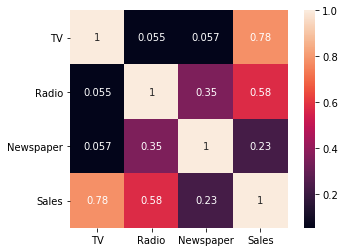

In [20]:
import seaborn as sns
sns.heatmap(data.corr(), vmax=1, square=True,annot=True)

In [21]:
#From this correlation matrix,it is clear that the effect of Newspaper on Sales is not significant

In [22]:
#Overall Comment-
#So we see that the scatter plot gives random pattern in case of Newspaper vs Sales plot,R-square value for the
#model(Sales~Newspaper) also indicates a bad fit and from this correlation matrix also,we see a very small 
#correlation value between them.

#So we will now try to fit a model excluding the variable Newspaper.(we already observed that TV and Radio have 
#significant effect on Sales)

# Effect of TV & Radio on Sales
# Multiple Linear Regression
(Excluding the effect of Newspaper)

In [23]:
lm = smf.ols(formula='Sales ~ TV + Radio ', data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           4.83e-98
Time:                        17:15:44   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Comment-
The R-square value suggests a very good fit.The value is same when the newspaper variable was also taken
in the model.So dropping the variable newspaper as predictor is not a wrong decision.So TV and Radio can 
explain the response variable 'Sales' significantly.Now we can use this model for predicting purposes.


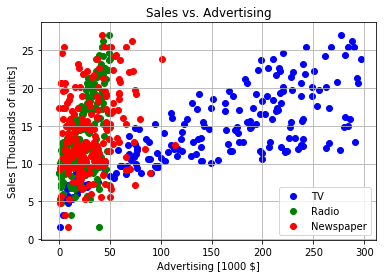

In [24]:
#Visualizing the whole data together in the same graph

%matplotlib inline

import matplotlib.pyplot as plt

plt.scatter(data.TV, data.Sales, color='blue', label="TV")
plt.scatter(data.Radio, data.Sales, color='green', label='Radio')
plt.scatter(data.Newspaper, data.Sales, color='red', label='Newspaper')

plt.legend(loc="lower right")
plt.title("Sales vs. Advertising")
plt.xlabel("Advertising [1000 $]")
plt.ylabel("Sales [Thousands of units]")
plt.grid()
plt.show()


In [25]:
#Now we will try to predict 'Sales' values based on the varibles 'TV' & 'Radio' by fitting
#the Linear Regression Model


# Train-Test Split

In [26]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data, random_state=42)

In [27]:
train.head()

,TV,Radio,Newspaper,Sales
114,78.2,46.8,34.5,14.6
173,168.4,7.1,12.8,11.7
5,8.7,48.9,75.0,7.2
126,7.8,38.9,50.6,6.6
117,76.4,0.8,14.8,9.4


In [28]:
test.head()

,TV,Radio,Newspaper,Sales
95,163.3,31.6,52.9,16.9
15,195.4,47.7,52.9,22.4
30,292.9,28.3,43.2,21.4
158,11.7,36.9,45.2,7.3
128,220.3,49.0,3.2,24.7


In [29]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [30]:
X_train=train[['TV','Radio']]
X_test=test[['TV','Radio']]
y_train=train['Sales']
y_test=test['Sales']

In [31]:
print("Shape of X_train and Y_train is {}".format(X_train.shape)+" and {} respectively".format(y_train.shape))
print("Shape of X_test and Y_test is {}".format(X_test.shape)+" and {} respectively".format(y_test.shape))

Shape of X_train and Y_train is (150, 2) and (150,) respectively
Shape of X_test and Y_test is (50, 2) and (50,) respectively


In [32]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
#model.intercept_
#model.coef_[0]

In [34]:
print("The multiple linear regression equation is : \nSales = {} +".format(model.intercept_)
      + "({})*TV + ".format(model.coef_[0]) + "({})*Radio".format(model.coef_[1]))

The multiple linear regression equation is : 
Sales = 2.824518914100972 +(0.04543316133330041)*TV + (0.19282112557510345)*Radio


In [35]:
#Here we find the mean square error

from sklearn import metrics
y_pred=model.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.6893770318599997


In [36]:
from sklearn.model_selection import cross_val_score

ln_model = LinearRegression()
cv_scores = cross_val_score(ln_model, X=X_train, y=y_train, cv=4, n_jobs=3)
print(cv_scores)


[0.83750987 0.93855298 0.91289634 0.84618483]


In [37]:
#checking correlation between y-test and y_pred
np.corrcoef(y_test,y_pred)

array([[1.        , 0.94615769],
       [0.94615769, 1.        ]])

y_test vs y_predicted: 


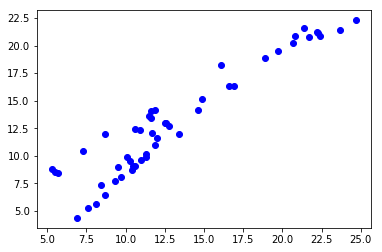

In [38]:
import matplotlib.pyplot as plt
print("y_test vs y_predicted: ")
plt.scatter(y_test, y_pred,color='blue', label="y_test")


In [39]:
#From the sctter plot of actual test values and predicted values, it seems that the prediction is good which
#implies that the fitting of the model is also good.

In [40]:
#If we include the interaction effects in the model then the fitting becomes very good.

In [41]:
lm = smf.ols(formula='Sales ~ TV + Radio+TV*Radio ', data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Thu, 07 Feb 2019   Prob (F-statistic):          6.68e-146
Time:                        17:17:49   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""